## Acquiring data and Vizualization

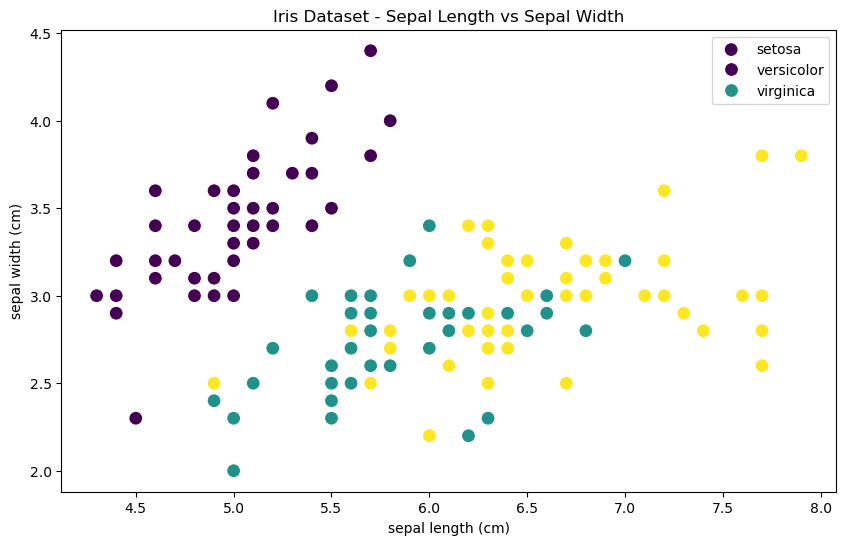

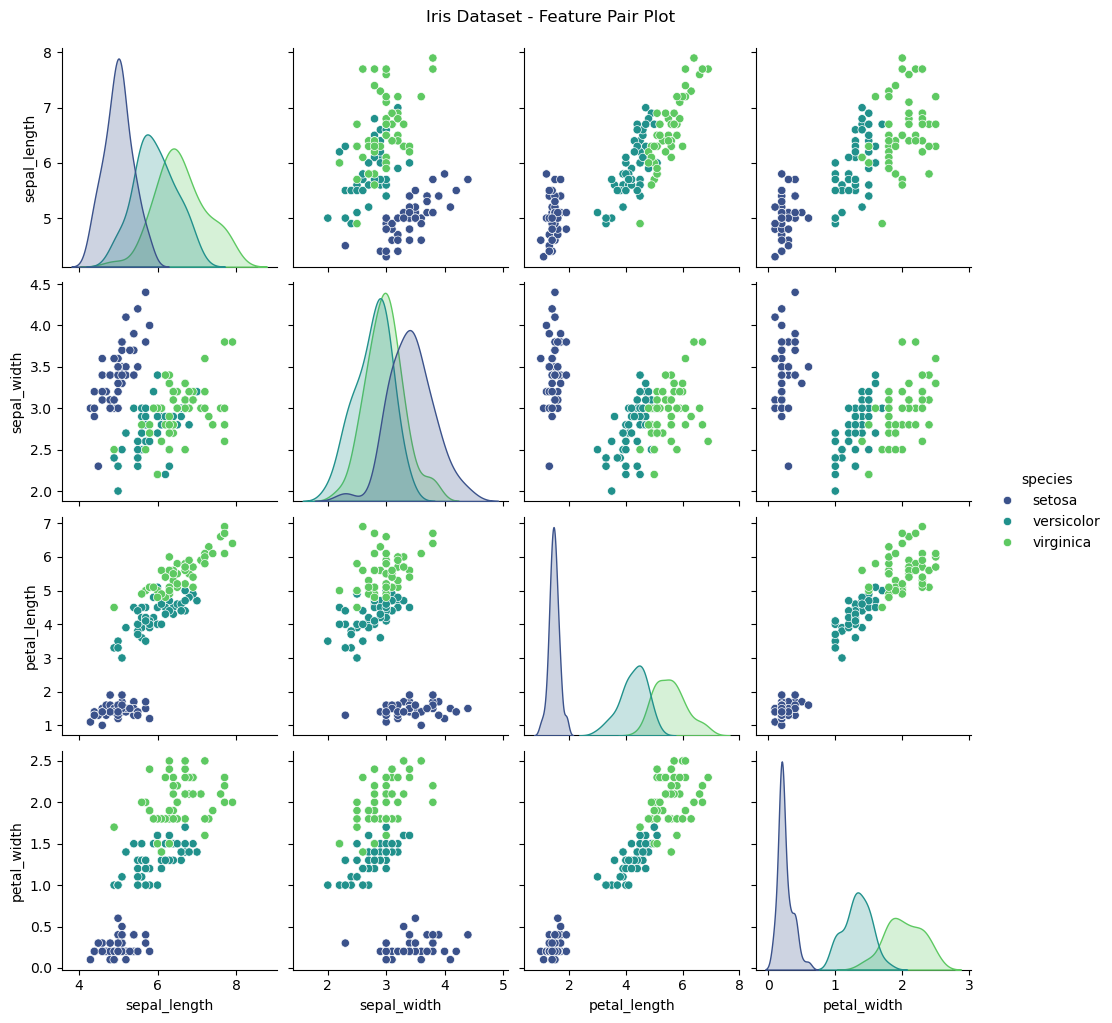

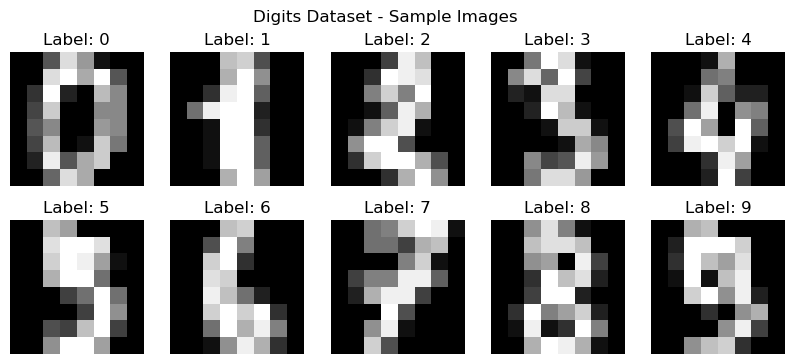

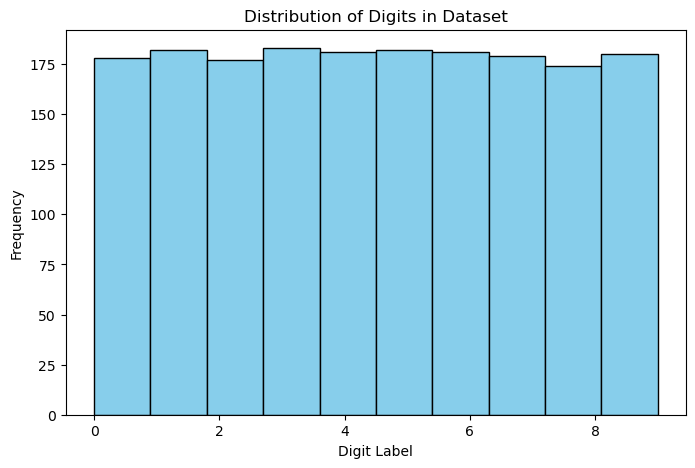

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names
iris_target_names = iris.target_names

# Scatter plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data[:, 0], y=iris_data[:, 1], hue=iris_target, palette="viridis", s=100)
plt.xlabel(iris_feature_names[0])
plt.ylabel(iris_feature_names[1])
plt.title("Iris Dataset - Sepal Length vs Sepal Width")
plt.legend(iris_target_names)
plt.show()

# Pairplot to show relationships between features
iris_df = sns.load_dataset("iris")  # load iris as a dataframe for easy plotting with seaborn
sns.pairplot(iris_df, hue="species", palette="viridis", diag_kind="kde")
plt.suptitle("Iris Dataset - Feature Pair Plot", y=1.02)
plt.show()

# Load the digits dataset
digits = datasets.load_digits()
digits_data = digits.data
digits_images = digits.images
digits_target = digits.target

# Plot the first few images of the Digits dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits_images[i], cmap="gray")
    ax.set_title(f"Label: {digits_target[i]}")
    ax.axis("off")
plt.suptitle("Digits Dataset - Sample Images")
plt.show()

# Plot a histogram of digit counts
plt.figure(figsize=(8, 5))
plt.hist(digits_target, bins=10, edgecolor='black', color='skyblue')
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.title("Distribution of Digits in Dataset")
plt.show()
